In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('goog.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400
60,3/17/2017,851.609985,853.400024,847.109985,852.119995,1712300


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,814.005573,817.755576,809.734066,814.561804,1.361269e+06
std,18.784303,18.556004,19.384799,19.265955,4.987376e+05
min,778.809998,782.780029,770.409973,771.820007,6.234000e+05
25%,799.679993,802.700012,793.270020,801.340027,1.057900e+06
50%,809.510010,815.250000,804.539978,809.559998,1.247700e+06
75%,828.659973,833.250000,825.059998,830.630005,1.494500e+06
max,851.609985,853.400024,847.109985,852.119995,3.228900e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1   Open    61 non-null     float64
 2   High    61 non-null     float64
 3   Low     61 non-null     float64
 4   Close   61 non-null     float64
 5   Volume  61 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


In [7]:
df.size

366

In [8]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

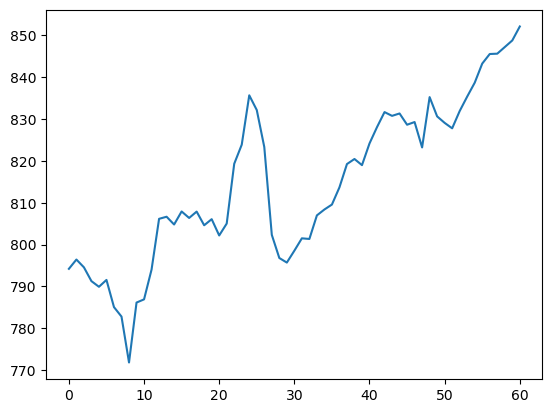

In [9]:
plt.plot(df['Close'])

In [10]:
#PREPROCESSING 

from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
df = mms.fit_transform(df['Close'].values.reshape(-1,1))

#It is the last trading price of the stock on a given trading day.

In [11]:
train_data = df[:int(len(df)*0.8)]
test_data = df[int(len(df)*0.8):]

In [12]:
len(train_data)

48

In [13]:
len(test_data)

13

In [14]:
def createdataset(data , step=4):
    x=[]
    y=[]
    for i in range(len(data)-step):
        x.append(data[i:i+1 , 0])
        y.append(data[i+1, 0])
    return np.array(x) , np.array(y)


# It generates samples from sequential data (data) where:
# x is the current value(s)
# y is the next value to be predicted

In [15]:
xtrain , ytrain = createdataset(train_data)
xtest , ytest = createdataset(test_data)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True , input_shape=(xtrain.shape[1],1)))
# Adds an LSTM layer with 50 memory units.
# return_sequences=True: This tells the LSTM to return the full sequence (needed when stacking LSTMs).
# input_shape=(timesteps, features) → Here:
# x_train.shape[1]: number of time steps)(assume timesteps=4)
# 1: number of features (like closing price per time step)
model.add(LSTM(50))
model.add(Dense(units=1))

model.compile(optimizer='adam' , loss='mse', metrics=['mae'])
model.summary()

C:\Users\tanis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.fit(xtrain , ytrain , epochs=50 , batch_size=4)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2322 - mae: 0.4489
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1738 - mae: 0.3797 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1531 - mae: 0.3395 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0765 - mae: 0.2311 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0420 - mae: 0.1690 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0153 - mae: 0.0998 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0162 - mae: 0.1099 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mae: 0.1075 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mae: 0.1024 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151 - mae: 0.0946 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121 - mae: 0.0880 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 - mae: 0.0862 
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━

In [18]:
ypred = model.predict(xtest)
ypred = mms.inverse_transform(ypred)
ytest = mms.inverse_transform(ytest.reshape(-1,1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


In [19]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
mse = mean_squared_error(ytest , ypred)
mae= mean_absolute_error(ytest , ypred)
rmse= np.sqrt(mse)
print('MSE : ', mse)
print('MAE : ', mae)
print('RMSE : ', rmse)

MSE :  10.366460683270747
MAE :  2.82482237282986
RMSE :  3.2196988497793932
